In [1]:
import os


os.mkdir("training")
os.mkdir("labels")
os.mkdir("images")

for dir in ["train", "test", "val"]:
  os.mkdir(f"training/{dir}")

for dir in ["train", "test", "val"]:
  os.mkdir(f"/content/training/{dir}/images")
  os.mkdir(f"/content/training/{dir}/labels")

LABEL_DATASET_DIR = "/content/labels"
IMG_DATASET_DIR = "/content/images"

TEST_IMG_DIR = "/content/training/test/images"
TEST_LABEL_DIR = "/content/training/test/labels"
VAL_IMG_DIR = "/content/training/val/images"
VAL_LABEL_DIR = "/content/training/val/labels"
TRAIN_IMG_DIR = "/content/training/train/images"
TRAIN_LABEL_DIR = "/content/training/train/labels"

In [2]:
!git clone https://github.com/ultralytics/yolov5 -q

In [3]:
import random

DATASET = [
  element.split(".")[0] 
  for element in os.listdir("/content/labels")]

TEST_DATASET = random.sample(population=DATASET,
                             k=int(0.1 * len(DATASET)))
VAL_DATASET = random.sample(population=[element for element in DATASET 
                                        if element not in TEST_DATASET],
                            k=(int(0.1 * len(DATASET))))
TRAIN_DATASET = [element for element in DATASET 
                 if element not in TEST_DATASET 
                 if element not in VAL_DATASET]

In [4]:
import shutil

def split_dataset(dataset: list,
                  img_dir: str,
                  label_dir: str) -> None:

  for element in dataset:
    label_path = os.path.join(LABEL_DATASET_DIR,
                              f"{element}.txt")
    img_path = os.path.join(IMG_DATASET_DIR,
                            f"{element}.jpg")

    shutil.move(src=label_path,
                dst=label_dir) 
    shutil.move(src=img_path,
                dst=img_dir)

In [5]:
split_dataset(dataset=TEST_DATASET,
     img_dir=TEST_IMG_DIR,
     label_dir=TEST_LABEL_DIR)

len(os.listdir(TEST_IMG_DIR)), len(os.listdir(TEST_LABEL_DIR))

(1, 1)

In [6]:
split_dataset(dataset=VAL_DATASET,
     img_dir=VAL_IMG_DIR,
     label_dir=VAL_LABEL_DIR)

len(os.listdir(VAL_IMG_DIR)), len(os.listdir(VAL_LABEL_DIR))

(1, 1)

In [7]:
split_dataset(dataset=TRAIN_DATASET,
     img_dir=TRAIN_IMG_DIR,
     label_dir=TRAIN_LABEL_DIR)

len(os.listdir(TRAIN_IMG_DIR)), len(os.listdir(TRAIN_LABEL_DIR))

(17, 17)

In [8]:
with open(file="/content/yolov5/data/parking_lines.yaml", mode="a", 
          encoding="utf8") as file:
  file.write(f"# dataset paths\n")
  file.write(f"train: {TRAIN_IMG_DIR}\n")
  file.write(f"val: {VAL_IMG_DIR}\n")
  file.write(f"test: {TEST_IMG_DIR}\n")
  file.write(f"\n# number of classes\n")
  file.write(f"nc: 1\n")
  file.write("\n# class names\n")
  file.write("names: ['parking_lines']")

In [ ]:
!python /content/yolov5/train.py \
  --img 640 \
  --cfg /content/yolov5/models/yolov5m.yaml \
  --hyp /content/yolov5/data/hyps/hyp.scratch-low.yaml \
  --epochs 500 \
  --data /content/yolov5/data/parking_lines.yaml \
  --weights yolov5s.pt \
  --name yolo_parking_lines

In [17]:
!python /content/yolov5/detect.py \
  --source /content/training/train/images/file26.jpg \
  --weights yolov5/runs/train/yolo_parking_lines/weights/best.pt \
  --conf 0.1 \
  --name yolo_road_det

detect: weights=['yolov5/runs/train/yolo_parking_lines/weights/best.pt'], source=/content/training/train/images/file26.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolo_road_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/training/train/images/file26.jpg: 384x640 61 parking_liness, 21.9ms
Speed: 0.4ms pre-process, 21.9ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/yolo_road_det5


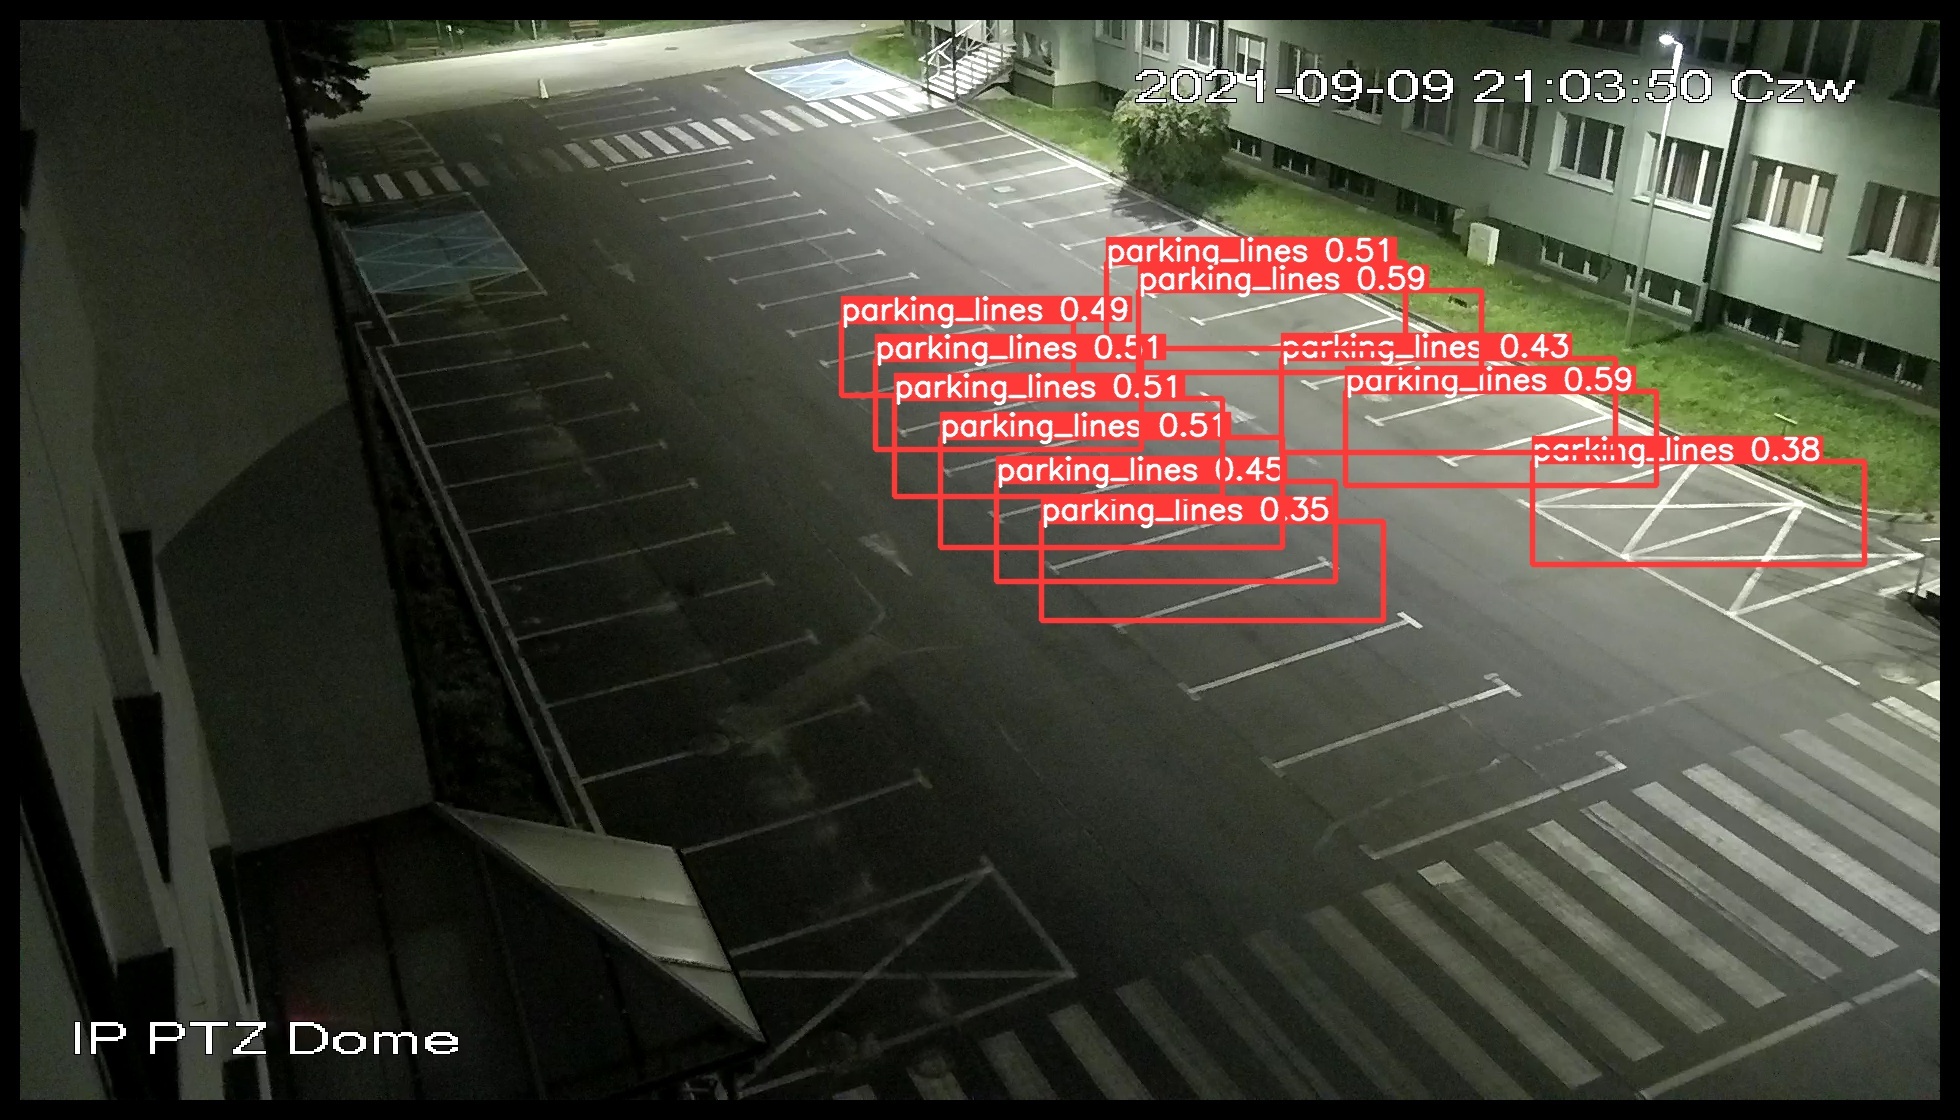

In [19]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(cv2.imread("/content/yolov5/runs/detect/yolo_road_det3/file26.jpg"))